# Pymaceuticals

In [237]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [238]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [239]:
# Files to Load 
mouse_file = "Data/mouse_drug_data.csv"
clinical_file = "Data/clinicaltrial_data.csv"

In [240]:
# Read the files
mouse_data = pd.read_csv(mouse_file)
clinical_data = pd.read_csv(clinical_file)

##### Combined dataset

In [245]:
# Combine the data into a single dataset
clinical_mouse_data = pd.merge(clinical_data, mouse_data, on = "Mouse ID", how = "outer")

#Format the tumor valume 
#clinical_mouse_data["Tumor Volume (mm3)"] = clinical_mouse_data["Tumor Volume (mm3)"].map("{:.2f}".format)

#clinical_mouse_data["Total Volume (mm3)"] = clinical_mouse_data["Total Volume (mm3)"].fillna(0, inplace=True)

# Select rows 
c_df = clinical_mouse_data.loc[clinical_mouse_data["Timepoint"] == 0,:]

#clinical_mouse_data.head()

# Reset the index after selecting desired rows
clinical_df = c_df.reset_index(drop=True)
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


### Tumor Response to Treatment

In [242]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = clinical_mouse_data.groupby(["Drug", "Timepoint"], as_index=False).mean()

del mean_tumor_volume["Metastatic Sites"]

mean_tumor_volume.head(100)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [243]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#  First select the columns necessary for the calculation
clinical_df=clinical_mouse_data[["Drug","Timepoint", "Tumor Volume (mm3)"]]

# Calculate standard error volume 
standard_error_volume = clinical_df.groupby(["Drug", "Timepoint"]).sem()

# Reset the index value to remove groupby values as indexes
standard_error_volume = standard_error_volume.reset_index()
 
# Preview DataFrame
standard_error_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [244]:
# Get timepoint and drug data to greate new dataFrame
# Select the necessary columns, and drop the rest
clinical_df = clinical_mouse_data.drop(["Mouse ID", "Metastatic Sites"], axis = 1)

# Create a pivot table from the data, set index and colums
drug_data = pd.pivot_table(clinical_df, index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
drug_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


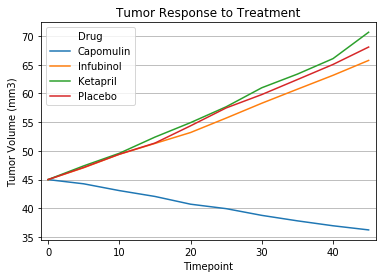

In [219]:
# Generate the Plot (with Error Bars)
# Select the column that needed for the plot
drug_df = drug_data[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Create standard error and mean variables for error bars
#error_df = standard_error_volume.loc[["Drug"] == "Capomulin" "Infubinol", "Ketapril", "Placebo"], :]
#mean_df = mean_tumor_volume.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"], :]

# Create the plot
ax = drug_df.plot(kind = "line")

#ax.errorbar(np.arange(0, len(mean_df)), mean_df, yerr=error_df)

ax.grid(axis="y")
plt.xlim(-1, 46)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

#ax = drug_df.plot(figsize=(12,8), yerr = standard_error_volume, legend = False)

#plot the markers
#ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
#ax.set_prop_cycle(None)
#plot the markers
#df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax)




plt.show()

# Save the Figure



### Metastatic Response to Treatment